## 一维有限差分解poisson

未经边界处理的左端矩阵A:
 [[ 50. -25.   0.   0.   0.   0.]
 [-25.  50. -25.   0.   0.   0.]
 [  0. -25.  50. -25.   0.   0.]
 [  0.   0. -25.  50. -25.   0.]
 [  0.   0.   0. -25.  50. -25.]
 [  0.   0.   0.   0. -25.  50.]]
未经边界处理的右端向量b:
 [ 9.8696044   7.98467769  3.04987549 -3.04987549 -7.98467769 -9.8696044 ]
x: [ 1.  0.  0.  0.  0. -1.]
经过边界处理的b: [-40.1303956   32.98467769   3.04987549  -3.04987549 -32.98467769
  40.1303956 ]
经过边界处理的A
: [[  1.   0.   0.   0.   0.   0.]
 [  0.  50. -25.   0.   0.   0.]
 [  0. -25.  50. -25.   0.   0.]
 [  0.   0. -25.  50. -25.   0.]
 [  0.   0.   0. -25.  50.   0.]
 [  0.   0.   0.   0.   0.   1.]]
经过边界处理的b
: [  1.          32.98467769   3.04987549  -3.04987549 -32.98467769  -1.        ]
误差为：
 0.00701427404435


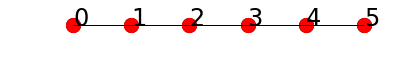

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

from fealpy.mesh import StructureIntervalMesh
from fealpy.pde.poisson_1d import CosData

I = np.array([0, 1], dtype=np.float)
h = 0.2
mesh = StructureIntervalMesh(I, h)
node = mesh.entity('node')

pde = CosData()

A = -mesh.laplace_operator()
b = pde.source(node)
print("未经边界处理的左端矩阵A:\n", A.toarray())
print("未经边界处理的右端向量b:\n", b)
#上述是未经过边值处理的A和b

isBdNode = mesh.ds.boundary_node_flag()#将边界位置显示True

NN = mesh.number_of_nodes() #节点数
x = np.zeros((NN,), dtype=np.float)
x[isBdNode] = pde.dirichlet(node[isBdNode]) #将边界的位置变成1和-1

print("x:", x)

b -= A@x
print("经过边界处理的b:", b)


bdIdx = np.zeros(NN, dtype=np.int)
bdIdx[isBdNode] = 1
Tbd = spdiags(bdIdx, 0, NN, NN)#边界的地方为1.其他地方为0
T = spdiags(1-bdIdx, 0, NN, NN)
A = T@A@T + Tbd #将边界的地方显示为1，其他地方仍是原来的A

b[isBdNode] = x[isBdNode] #将经过边界处理的b的边界位置化为1
print("经过边界处理的A\n:", A.toarray())
print("经过边界处理的b\n:", b)

x = spsolve(A, b)

print("误差为：\n",np.max(np.abs(x - pde.solution(node))))



fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes, showindex=True)
plt.show()

## 二维有限差分解poisson

未经边界处理的左端矩阵A:
 [[-16.   4.   0.   4.   0.   0.   0.   0.   0.]
 [  4. -16.   4.   0.   4.   0.   0.   0.   0.]
 [  0.   4. -16.   0.   0.   4.   0.   0.   0.]
 [  4.   0.   0. -16.   4.   0.   4.   0.   0.]
 [  0.   4.   0.   4. -16.   4.   0.   4.   0.]
 [  0.   0.   4.   0.   4. -16.   0.   0.   4.]
 [  0.   0.   0.   4.   0.   0. -16.   4.   0.]
 [  0.   0.   0.   0.   4.   0.   4. -16.   4.]
 [  0.   0.   0.   0.   0.   4.   0.   4. -16.]]
未经边界处理的右端向量b:
 [  1.97392088e+01   1.20867794e-15  -1.97392088e+01   1.20867794e-15
   7.40101788e-32  -1.20867794e-15  -1.97392088e+01  -1.20867794e-15
   1.97392088e+01]
x: [  1.00000000e+00   6.12323400e-17  -1.00000000e+00   6.12323400e-17
   0.00000000e+00  -6.12323400e-17  -1.00000000e+00  -6.12323400e-17
   1.00000000e+00]
经过边界处理的b: [  3.57392088e+01   2.09685636e-15  -3.57392088e+01   2.09685636e-15
   7.40101788e-32  -2.09685636e-15  -3.57392088e+01  -2.09685636e-15
   3.57392088e+01]
经过边界处理的A
: [[  1.   0.   0.   0.   0.   0.   0.   0. 

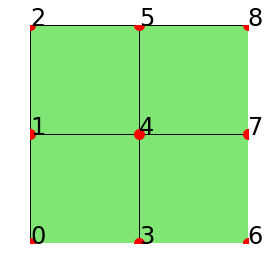

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from fealpy.mesh.StructureQuadMesh import StructureQuadMesh
from fealpy.pde.poisson_2d import CosCosData

L=1
box = [0, L, 0, L]
qmesh = StructureQuadMesh(box, nx=2, ny=2)
node = qmesh.entity('node')

pde = CosCosData()

A = -qmesh.laplace_operator()
b = pde.source(node)
print("未经边界处理的左端矩阵A:\n", A.toarray())
print("未经边界处理的右端向量b:\n", b)
#上述是未经过边值处理的A和b

isBdNode = qmesh.ds.boundary_node_flag()#将边界位置显示True

NN = qmesh.number_of_nodes() #节点数
x = np.zeros((NN,), dtype=np.float)
x[isBdNode] = pde.dirichlet(node[isBdNode]) #将边界的位置变成1和-1

print("x:", x)

b -= A@x
print("经过边界处理的b:", b)


bdIdx = np.zeros(NN, dtype=np.int)
bdIdx[isBdNode] = 1
Tbd = spdiags(bdIdx, 0, NN, NN)#边界的地方为1.其他地方为0
T = spdiags(1-bdIdx, 0, NN, NN)
A = T@A@T + Tbd #将边界的地方显示为1，其他地方仍是原来的A

b[isBdNode] = x[isBdNode] #将经过边界处理的b的边界位置化为1
print("经过边界处理的A\n:", A.toarray())
print("经过边界处理的b\n:", b)

x = spsolve(A, b)

print("误差为：\n",np.max(np.abs(x - pde.solution(node))))



fig = plt.figure()
axes = fig.gca()
qmesh.add_plot(axes)
qmesh.find_node(axes, showindex=True)
plt.show()

## 未考虑边值条件的poisson问题
$$
-\Delta u=f(x)\\
f(x)=2\pi ^2 \sin(\pi x)
$$
其中真解$u(x)=\sin(\pi x)$

[[ 200. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-100.  200. -100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.  200. -100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -100.  200. -100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -100.  200. -100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100.  200. -100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -100.  200. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -100.  200. -100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -100.  200. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -100.  200. -100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0. -100.  200.]]
误差为 0.00826541696623


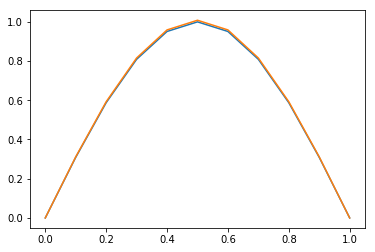

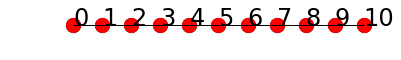

In [2]:
import numpy as np
from fealpy.mesh import StructureIntervalMesh
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def u(x):#真解
    return np.sin(np.pi*x)

def f(x):#右端函数
    return np.pi**2*np.sin(np.pi*x) 

smesh=StructureIntervalMesh([0,1],0.1)
NN = smesh.number_of_nodes()#节点个数
node = smesh.entity('node')

A = -smesh.laplace_operator().tocsr()
#b是右端向量
b = f(node)

#这里因为没有考虑边值条件，所以我们去掉边值条件，只考虑内部节点
uh = np.zeros(NN, dtype=np.float)
uh[1:-1] = spsolve(A[1:-1, :][:, 1:-1], b[1:-1])


#下面为真解与数值解的误差
error = np.max(np.abs(uh - u(node)))

plt.plot(node, u(node))
plt.plot(node,uh)

print(A.toarray())
print("误差为",error)


fig = plt.figure()
axes = fig.gca()
smesh.add_plot(axes)
smesh.find_node(axes, showindex=True)
plt.show()

In [ ]:
import numpy as np
from fealpy.mesh import StructureIntervalMesh
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def u(x):#真解
    return np.sin(np.pi*x)

def f(x):#右端函数
    return np.pi**2*np.sin(np.pi*x) 

smesh=StructureIntervalMesh([0,1],0.1)
NN = smesh.number_of_nodes()#节点个数
node = smesh.entity('node')

A = -smesh.laplace_operator().tocsr()
#b是右端向量
b = f(node)

#这里因为没有考虑边值条件，所以我们去掉边值条件，只考虑内部节点
uh = np.zeros(NN, dtype=np.float)
uh[1:-1] = spsolve(A[1:-1, :][:, 1:-1], b[1:-1])


#下面为真解与数值解的误差
error = np.max(np.abs(uh - u(node)))

plt.plot(node, u(node))
plt.plot(node,uh)

print(A.toarray())
print("误差为",error)


fig = plt.figure()
axes = fig.gca()
smesh.add_plot(axes)
smesh.find_node(axes, showindex=True)
plt.show()